# TP 2. PARTIE 2. Analyse du jeu de données vowel


## Plan :

   - Exploration des données 

   - Naive Bayes
   
   - LDA
   
   - QDA
   
   - k-NN avec cross validation
   
   - Decision Trees avec cross validation
   
   - Choix meilleur Classifieur

Tous les graphes et images sont enregistrés et inclus dans le fichier déposé sur github.

In [132]:
#Données
import numpy as np
import pandas as pd

#Graphes
import graphviz
from graphviz import Source
from IPython.display import SVG
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

#Methodes/Classifieurs
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


In [133]:
names = ["Naive Bayes", "LDA", "QDA","KNN", "Decisions Tree"]
classifiers = [
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    KNeighborsClassifier(),
    DecisionTreeClassifier()
    ]

# 1. Dataset Vowel : Exploration des données


https://web.stanford.edu/~hastie/ElemStatLearn/data.html

#### Description des données

Speaker independent recognition of the eleven steady state vowels
of British English using a specified training set of lpc derived log area
ratios.

#### Importation des données train et test

In [136]:
train = pd.read_csv('vowel.train.csv', sep=',', index_col=0)
train.head()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
1,1,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814
2,2,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488
3,3,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049
4,4,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795
5,5,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396


In [137]:
test = pd.read_csv('vowel.test.csv', sep=',', index_col=0)
test.head()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
1,1,-1.149,-0.904,-1.988,0.739,-0.060,1.206,0.864,1.196,-0.300,-0.467
2,2,-2.613,-0.092,-0.540,0.484,0.389,1.741,0.198,0.257,-0.375,-0.604
3,3,-2.505,0.632,-0.593,0.304,0.496,0.824,-0.162,0.181,-0.363,-0.764
4,4,-1.768,1.769,-1.142,-0.739,-0.086,0.120,-0.230,0.217,-0.009,-0.279
5,5,-2.671,3.155,-0.514,0.133,-0.964,0.234,-0.071,1.192,0.254,-0.471


In [138]:
print("La taille du train est ",train.shape)
print("La taille du test est ",test.shape)

La taille du train est  (528, 11)
La taille du test est  (462, 11)


In [139]:
print("Les valeurs possibles pour le label sont:",np.unique(train['y']))

Les valeurs possibles pour le label sont: [ 1  2  3  4  5  6  7  8  9 10 11]


C'est un problème de classification multi-classes à 11 classes.
On vérifie si le nombre d'observations par classes (class balancing) est bien équilibré.

#### Répartition des y

Text(0.5, 1.0, 'Repartion des observations dans les 11 classes du train')

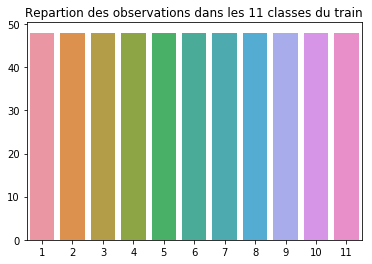

In [140]:
sns.barplot(np.unique(train['y']), train.groupby('y').count().values[:,0])
plt.title("Repartion des observations dans les 11 classes du train")

Text(0.5, 1.0, 'Repartion des observations dans les 11 classes du test')

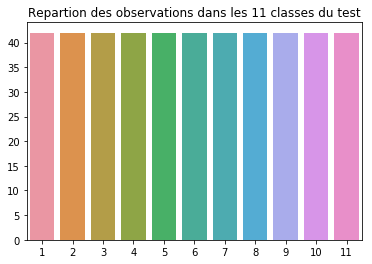

In [141]:
sns.barplot(np.unique(test['y']), test.groupby('y').count().values[:,0])
plt.title("Repartion des observations dans les 11 classes du test")

Toutes les classes sont équitablement représentées dans le train et dans le test.

#### Définition des matrices de features et des matrices de labels pour le train et le test

In [142]:
Y_train = train.values[:,0]
X_train = train.values[:,1:]

Y_test = test.values[:,0]
X_test = test.values[:,1:]

In [143]:
print("Taille de X_train: ", X_train.shape)
print("Taille de Y_train: ", Y_train.shape)
print("Taille de X_test: ", X_test.shape)
print("Taille de Y_test: ", Y_test.shape)

Taille de X_train:  (528, 10)
Taille de Y_train:  (528,)
Taille de X_test:  (462, 10)
Taille de Y_test:  (462,)


# 2.Naive Bayes

In [144]:
NB = GaussianNB()
NB_fit = NB.fit(X=X_train,y=Y_train)

In [145]:
score_test_NB = accuracy_score(NB_fit.predict(X_test),Y_test)
print("Le score sur le train est", ("%.3f" % accuracy_score(NB_fit.predict(X_train),Y_train)))
print("Le score sur le test est", ("%.3f" % accuracy_score(NB_fit.predict(X_test),Y_test)))

Le score sur le train est 0.720
Le score sur le test est 0.461


# 3. LDA

In [146]:
LDA = LinearDiscriminantAnalysis()
LDA_fit = LDA.fit(X=X_train,y=Y_train)

In [147]:
score_test_LDA = accuracy_score(LDA_fit.predict(X_test),Y_test)
print("Le score sur le train est", ("%.3f" % accuracy_score(LDA_fit.predict(X_train),Y_train)))
print("Le score sur le test est", ("%.3f" % accuracy_score(LDA_fit.predict(X_test),Y_test)))

Le score sur le train est 0.684
Le score sur le test est 0.444


# 4.QDA

In [148]:
QDA = QuadraticDiscriminantAnalysis()
QDA_fit = QDA.fit(X=X_train,y=Y_train)

In [149]:
score_test_QDA = accuracy_score(QDA_fit.predict(X_test),Y_test)
print("Le score sur le train est", ("%.3f" % accuracy_score(QDA_fit.predict(X_train),Y_train)))
print("Le score sur le test est", ("%.3f" % accuracy_score(QDA_fit.predict(X_test),Y_test)))

Le score sur le train est 0.989
Le score sur le test est 0.472


# 5.k-NN

#### Différentes valeurs de k

In [150]:
KNN_3 = KNeighborsClassifier(n_neighbors = 3)
KNN_3_fit = KNN_3.fit(X_train, Y_train)
print("Le score sur le train avec 3 voisins est", accuracy_score(KNN_3_fit.predict(X_train),Y_train))
print("Le score sur le test avec 3 voisins est", accuracy_score(KNN_3_fit.predict(X_test),Y_test))

Le score sur le train avec 3 voisins est 0.9981060606060606
Le score sur le test avec 3 voisins est 0.564935064935065


In [151]:
KNN_9 = KNeighborsClassifier(n_neighbors = 9)
KNN_9_fit = KNN_9.fit(X_train, Y_train)
print("Le score sur le train avec 9 voisins est", accuracy_score(KNN_9_fit.predict(X_train),Y_train))
print("Le score sur le test avec 9 voisins est", accuracy_score(KNN_9_fit.predict(X_test),Y_test))

Le score sur le train avec 9 voisins est 0.9450757575757576
Le score sur le test avec 9 voisins est 0.5800865800865801


In [152]:
KNN_12 = KNeighborsClassifier(n_neighbors = 12)
KNN_12_fit = KNN_12.fit(X_train, Y_train)
print("Le score sur le train avec 12 voisins est", accuracy_score(KNN_12_fit.predict(X_train),Y_train))
print("Le score sur le test avec 12 voisins est", accuracy_score(KNN_12_fit.predict(X_test),Y_test))

Le score sur le train avec 12 voisins est 0.8257575757575758
Le score sur le test avec 12 voisins est 0.5584415584415584


#### De façon plus automatique

In [153]:
accur_score_kNN_train = [] 
accur_score_kNN_test = []

for i in range(1,50):
    kNN = KNeighborsClassifier(n_neighbors = i)
    kNN_fit = kNN.fit(X_train, Y_train)
    accur_score_kNN_train.append( accuracy_score(kNN_fit.predict(X_train),Y_train))
    accur_score_kNN_test.append( accuracy_score(kNN_fit.predict(X_test),Y_test))
    
    print("Pour k=",i,", score test : ", ("%.3f" % accuracy_score(kNN_fit.predict(X_test),Y_test)), \
          ", score train : ", ("%.3f" % accuracy_score(kNN_fit.predict(X_train),Y_train)) )

Pour k= 1 , score test :  0.563 , score train :  1.000
Pour k= 2 , score test :  0.552 , score train :  0.998
Pour k= 3 , score test :  0.565 , score train :  0.998
Pour k= 4 , score test :  0.587 , score train :  0.992
Pour k= 5 , score test :  0.578 , score train :  0.983
Pour k= 6 , score test :  0.608 , score train :  0.977
Pour k= 7 , score test :  0.602 , score train :  0.968
Pour k= 8 , score test :  0.589 , score train :  0.947
Pour k= 9 , score test :  0.580 , score train :  0.945
Pour k= 10 , score test :  0.587 , score train :  0.924
Pour k= 11 , score test :  0.563 , score train :  0.926
Pour k= 12 , score test :  0.558 , score train :  0.826
Pour k= 13 , score test :  0.550 , score train :  0.801
Pour k= 14 , score test :  0.556 , score train :  0.777
Pour k= 15 , score test :  0.554 , score train :  0.771
Pour k= 16 , score test :  0.535 , score train :  0.746
Pour k= 17 , score test :  0.558 , score train :  0.714
Pour k= 18 , score test :  0.565 , score train :  0.705
P

L'accuracy-score sur le test augmente jusqu'a k = 6 puis redescend.
Visualisons l'accuracy-score:

#### Plot de l'accuracy-score

Text(0, 0.5, 'Accuracy score')

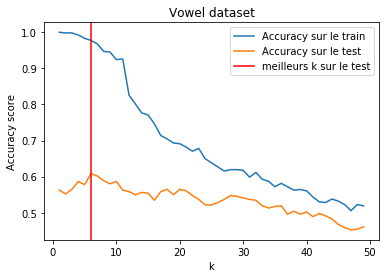

In [154]:
plt.plot(np.arange(1,50), accur_score_kNN_train, label = "Accuracy sur le train")
plt.plot(np.arange(1,50), accur_score_kNN_test, label = "Accuracy sur le test")

plt.axvline(np.arange(1,50)[np.argmax(accur_score_kNN_test)], label = "meilleurs k sur le test", color = "red", alpha = 1)

plt.legend()
plt.title("Vowel dataset")
plt.xlabel("k")
plt.ylabel("Accuracy score")

Text(0, 0.5, 'Accuracy score')

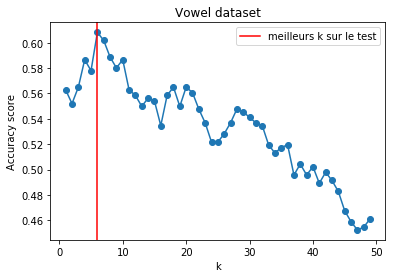

In [155]:
plt.plot(np.arange(1,50),accur_score_kNN_test, 'o-')
plt.axvline(np.arange(1,50)[np.argmax(accur_score_kNN_test)], label = "meilleurs k sur le test", color = "red", alpha = 1)

plt.legend()
plt.title("Vowel dataset")
plt.xlabel("k")
plt.ylabel("Accuracy score")

#np.argmax(accur_score_kNN_test)

#### Cross Validation à 10 fold

In [156]:
knn_cv = KNeighborsClassifier(n_neighbors = 6)

cv_scores = cross_val_score(knn_cv, X_train, Y_train, cv = 10) # On coupe le train en 10 parties puis on calcule l'accuray 
                                                                #score sur chaque "morceaux"

print("Les scores obtenus apres cross validation à 10 fold sont : \n\n",cv_scores,"\n") #affichage des scores

print("Moyenne des score : ",format(np.mean(cv_scores))) # moyenne des scores

Les scores obtenus apres cross validation à 10 fold sont : 

 [0.49090909 0.8        0.72727273 0.74545455 0.69090909 0.8
 0.65454545 0.67272727 0.84090909 0.56818182] 

Moyenne des score :  0.6990909090909091


#### Choix du meilleurs k (hypertuning model parameters)

In [157]:


# Dictionnaire de tous les k qu'on veut tester "n_neighbors": 
#grille = {'k' : [1,20]} 
params = {'n_neighbors':[5,6,7,8,9,10]}
#on cherche le meilleur k en cross validant
knn_cv_best_k = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params, cv = 5) 

#Entrainement du model
knn_cv_best_k.fit(X_train,Y_train)


C:\Users\odeli\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [158]:

print("Meilleur parametre:",knn_cv_best_k.best_params_ )
print("Meilleur score:",knn_cv_best_k.best_score_)



Meilleur parametre: {'n_neighbors': 5}
Meilleur score: 0.6193181818181818


# 6.Decisions Tree

#### Arbre Parfait

In [159]:
arbre_parfait = DecisionTreeClassifier()
arbre_parfait_fit = arbre_parfait.fit(X_train, Y_train)
print("Le score sur le train est", ("%.3f" % accuracy_score(arbre_parfait_fit.predict(X_train),Y_train)))
print("Le score sur le test est", ("%.3f" % accuracy_score(arbre_parfait_fit.predict(X_test),Y_test)))

Le score sur le train est 1.000
Le score sur le test est 0.455


#### Plusieurs valeurs pour la profondeur max

 Pour max_depth =  1 , erreur train :  3.6236282671076814 , erreur test :  3.68041499636312
 Pour max_depth =  2 , erreur train :  2.4347546699883957 , erreur test :  2.368626101855168
 Pour max_depth =  3 , erreur train :  3.255240530143803 , erreur test :  4.240089029531688
 Pour max_depth =  4 , erreur train :  2.6020824993326657 , erreur test :  3.5050983275386565
 Pour max_depth =  5 , erreur train :  2.4756388829528184 , erreur test :  3.765875486765087
 Pour max_depth =  6 , erreur train :  2.1132697629287867 , erreur test :  3.26698028355853
 Pour max_depth =  7 , erreur train :  1.9928850717216258 , erreur test :  3.541650751173814
 Pour max_depth =  8 , erreur train :  1.999052806008916 , erreur test :  3.311726508565052
 Pour max_depth =  9 , erreur train :  1.999052806008916 , erreur test :  3.4672243973595105
 Pour max_depth =  10 , erreur train :  1.999052806008916 , erreur test :  3.310745982560269
 Pour max_depth =  11 , erreur train :  1.999052806008916 , erreur test :

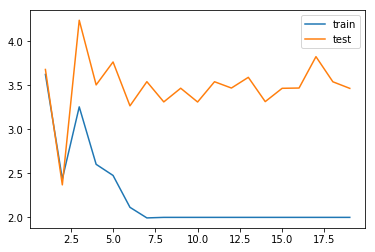

In [160]:
courbe_err_test = []
courbe_err_train = []
for max_depth in range(1,20) :
    arbre_cv = DecisionTreeClassifier(min_samples_leaf = 10, max_depth = max_depth)
    arbre_cv_fit = arbre_cv.fit(X_train, Y_train)
    erreur_train = mean_squared_error( arbre_cv_fit.predict(X_train), Y_train)**0.5
    erreur_test = mean_squared_error( arbre_cv_fit.predict(X_test), Y_test)**0.5
    print(" Pour max_depth = ",max_depth,", " "erreur train : ",erreur_train, ", " "erreur test : ",erreur_test)
    courbe_err_train.append((max_depth, erreur_train))
    courbe_err_test.append((max_depth, erreur_test))
    
err_min_test = min(c[1] for c in courbe_err_test)
    
plt.plot ( [c[0] for c in courbe_err_train], [c[1] for c in courbe_err_train], label = "train")
plt.plot ( [c[0] for c in courbe_err_test], [c[1] for c in courbe_err_test], label = "test")

plt.legend()

In [161]:
print("L'erreur minimale sur le test est :",( "%.4f" % err_min_test ),"elle est atteinte pour max_depth = 2")

L'erreur minimale sur le test est : 2.3686 elle est atteinte pour max_depth = 2


Text(0, 0.5, 'Erreur')

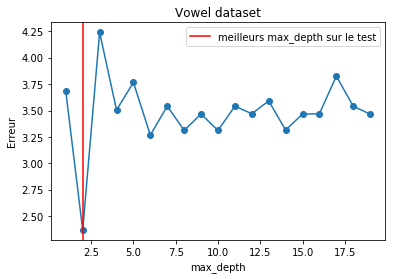

In [162]:
plt.plot([c[0] for c in courbe_err_test], [c[1] for c in courbe_err_test], 'o-')
plt.axvline(2, label="meilleurs max_depth sur le test", color="red", alpha = 1)

plt.legend()
plt.title("Vowel dataset")
plt.xlabel("max_depth")
plt.ylabel("Erreur")

#### Cross Validation à 10 fold

In [163]:
arbre_cv = DecisionTreeClassifier(min_samples_leaf = 10, max_depth = max_depth)

cv_scores_arbre = cross_val_score(arbre_cv, X_train, Y_train, cv = 10) # On coupe le train en 10 parties puis on calcule l'accuray 
                                                                #score sur chaque "morceaux"

print("Les scores obtenus apres cross validation à 10 fold sont : \n\n",cv_scores_arbre,"\n") #affichage des scores

print("Moyenne des score : ",format(np.mean(cv_scores_arbre))) # moyenne des scores

Les scores obtenus apres cross validation à 10 fold sont : 

 [0.30909091 0.54545455 0.6        0.50909091 0.65454545 0.43636364
 0.61818182 0.50909091 0.52272727 0.25      ] 

Moyenne des score :  0.4954545454545454


#### Hypertuning model parameter (max_depth)

In [164]:

params_bis = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11], }
#on cherche le meilleur k en cross validant
arbre_cv_best_depth = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = params_bis, cv = 5) 

#Entrainement du model
arbre_cv_best_depth.fit(X_train,Y_train)


C:\Users\odeli\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [165]:
print("Meilleur parametre:",arbre_cv_best_depth.best_params_ )
print("Meilleur score:",arbre_cv_best_depth.best_score_)

Meilleur parametre: {'max_depth': 6}
Meilleur score: 0.4981060606060606


#### Affichage Arbre

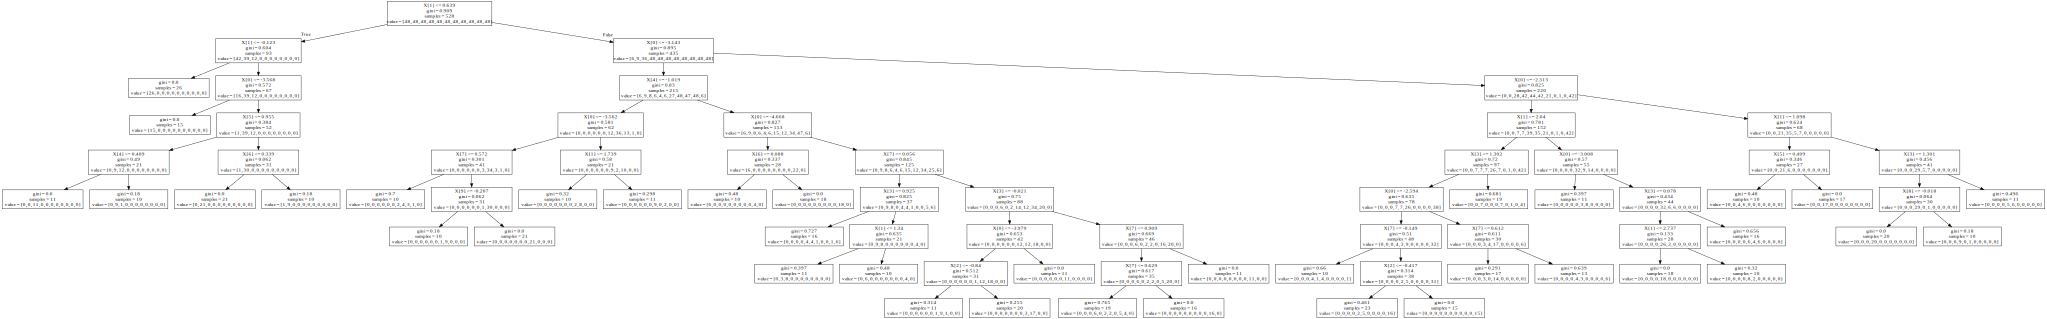

In [166]:
profondeur_final = 8
arbre_final = DecisionTreeClassifier(min_samples_leaf = 10, max_depth = profondeur_final)
arbre_final_fit = arbre_final.fit(X_train, Y_train)
graph = Source( tree.export_graphviz(arbre_final_fit, out_file=None, feature_names=None))
SVG(graph.pipe(format='svg'))

(L'arbre est plus lisible dans le fichier fig.)

# 7. Choix Meilleur Classifieur

#### Comparaison de l'accuracy score de tous les models 

In [167]:
print("L'accuracy-score pour le Classsifieur Naive Bayes est :" ,score_test_NB)
print("L'accuracy-score pour le Classifieur LDA est :" ,score_test_LDA)
print("L'accuracy-score pour le Classifieur QDA est :" ,score_test_QDA)
print("L'accuracy-score pour le Classifier KNN est :" ,knn_cv_best_k.best_score_)
print("L'accuracy-score pour le Classifieur DecisionTree est :" ,arbre_cv_best_depth.best_score_)

L'accuracy-score pour le Classsifieur Naive Bayes est : 0.461038961038961
L'accuracy-score pour le Classifieur LDA est : 0.44372294372294374
L'accuracy-score pour le Classifieur QDA est : 0.47186147186147187
L'accuracy-score pour le Classifier KNN est : 0.6193181818181818
L'accuracy-score pour le Classifieur DecisionTree est : 0.4981060606060606


Le meilleur Classifier est le KNN.